<a href="https://colab.research.google.com/github/dmi3eva/araneae/blob/main/p1_spider_analysis/03_length_and_intersection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content
%cd drive
%cd My\ Drive
%cd PhD
%cd Paper_01

/content
/content/drive
/content/drive/My Drive
/content/drive/My Drive/PhD
/content/drive/My Drive/PhD/Paper_01


In [3]:
DB_PATH = "datasets/spider/database"
SCHEMES_PATH = "datasets/spider/tables.json"

### Loading

In [4]:
import json
import collections
import matplotlib.pyplot as plt
import sqlite3
import os

In [5]:
%matplotlib inline 

## Utils

In [6]:
def execute_request(db_id, sql):
    db = os.path.join(DB_PATH, db_id, db_id + ".sqlite")
    conn = sqlite3.connect(db)
    conn.text_factory = lambda b: b.decode(errors = 'ignore')
    cursor = conn.cursor()   
    try:
        cursor.execute(sql)
        res = cursor.fetchall()
        return res
    except:
        raise ValueError

In [13]:
db_ids = os.listdir(DB_PATH)
db_ids

['academic',
 'activity_1',
 'aircraft',
 'allergy_1',
 'apartment_rentals',
 'architecture',
 'assets_maintenance',
 'baseball_1',
 'battle_death',
 'behavior_monitoring',
 'bike_1',
 'body_builder',
 'book_2',
 'browser_web',
 'candidate_poll',
 'car_1',
 'chinook_1',
 'cinema',
 'city_record',
 'climbing',
 'club_1',
 'coffee_shop',
 'college_1',
 'college_2',
 'college_3',
 'company_1',
 'company_employee',
 'company_office',
 'concert_singer',
 'county_public_safety',
 'course_teach',
 'cre_Doc_Control_Systems',
 'cre_Doc_Template_Mgt',
 'cre_Doc_Tracking_DB',
 'cre_Docs_and_Epenses',
 'cre_Drama_Workshop_Groups',
 'cre_Theme_park',
 'csu_1',
 'culture_company',
 'customer_complaints',
 'customer_deliveries',
 'customers_and_addresses',
 'customers_and_invoices',
 'customers_and_products_contacts',
 'customers_campaigns_ecommerce',
 'customers_card_transactions',
 'debate',
 'decoration_competition',
 'department_management',
 'department_store',
 'device',
 'document_management',

In [23]:
with open(SCHEMES_PATH) as table_file:
  schemes = json.load(table_file)

tables = {_s['db_id']: _s['table_names_original'] for _s in schemes}

columns = {
    _s['db_id']: {
        _table: [] for _table in _s['table_names_original']
    } for _s in schemes
}
for _scheme in schemes:
  db_id = _scheme['db_id']
  table_names = _scheme['table_names_original']
  for _column in _scheme["column_names_original"]:
    column_name = _column[1]
    table_name = table_names[_column[0]]
    if column_name == '*':
      continue
    columns[db_id][table_name].append(column_name)

In [24]:
def get_db_tables(db):
  return tables[db]

In [25]:
def get_db_columns(db, table):
  return columns[db][table]

In [43]:
REQUEST_MASK = """SELECT \"{column}\" FROM \"{table}\"""" 
def get_db_values(db, table, column):
  # Возвращает значения из столбца данной таблицы
  aim_request = REQUEST_MASK.format(table=table, column=column)
  try:
    response = execute_request(db, aim_request)
    values = [str(_v[0]) for _v in list(response)]
    return values
  except ValueError:
    print()
    print(f"Problem with {column} in {table} (db = {db}). Request: {aim_request}")
    return []

## Envestigation

In [8]:
from collections import Counter

### DB's exploring

Длины слов

In [11]:
db_lens = [len(_db) for _db in db_ids] 
db_cnt = Counter(db_lens)

In [12]:
db_cnt

Counter({3: 1,
         4: 4,
         5: 4,
         6: 15,
         7: 14,
         8: 12,
         9: 13,
         10: 8,
         11: 12,
         12: 17,
         13: 6,
         14: 12,
         15: 6,
         16: 2,
         17: 4,
         18: 5,
         19: 5,
         20: 4,
         21: 4,
         22: 4,
         23: 3,
         24: 1,
         25: 1,
         26: 1,
         27: 3,
         28: 3,
         29: 1,
         31: 1})

In [14]:
db_x = sorted(list(db_cnt.keys()))
db_y = [db_cnt[_x] for _x in db_x] 

<BarContainer object of 28 artists>

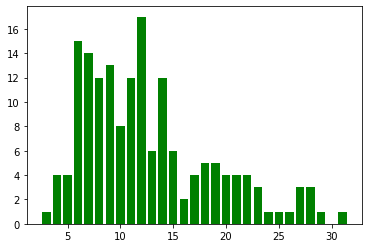

In [16]:
plt.bar(db_x, db_y, color='green')

Количества слов

<BarContainer object of 4 artists>

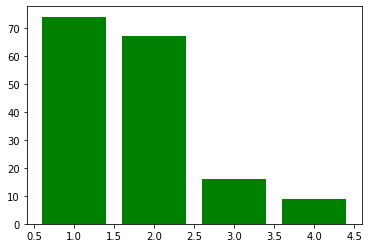

In [52]:
db_tokens_lens = [len(_db.replace('_1', '').replace('_2', '').replace('_3', '').replace('_4', '').split('_')) for _db in db_ids] 
db_tokens_cnt = Counter(db_tokens_lens)
db_tokens_x = sorted(list(db_tokens_cnt.keys()))
db_tokens_y = [db_tokens_cnt[_x] for _x in db_tokens_x] 
plt.bar(db_tokens_x, db_tokens_y, color='green')

### Tables research

In [26]:
db_tables = get_db_tables("store_product")
db_tables

['product', 'store', 'district', 'store_product', 'store_district']

In [31]:
tables_tokens_lens = []
for _db in db_ids:
  db_tables = get_db_tables(_db)
  print(db_tables)
  table_tokens = [len(_t.split('_')) for _t in db_tables] 
  tables_tokens_lens += table_tokens

['author', 'conference', 'domain', 'domain_author', 'domain_conference', 'journal', 'domain_journal', 'keyword', 'domain_keyword', 'publication', 'domain_publication', 'organization', 'publication_keyword', 'writes', 'cite']
['Activity', 'Participates_in', 'Faculty_Participates_in', 'Student', 'Faculty']
['pilot', 'aircraft', 'match', 'airport', 'airport_aircraft']
['Allergy_Type', 'Has_Allergy', 'Student']
['Apartment_Buildings', 'Apartments', 'Apartment_Facilities', 'Guests', 'Apartment_Bookings', 'View_Unit_Status']
['architect', 'bridge', 'mill']
['Third_Party_Companies', 'Maintenance_Contracts', 'Parts', 'Skills', 'Staff', 'Assets', 'Asset_Parts', 'Maintenance_Engineers', 'Engineer_Skills', 'Fault_Log', 'Engineer_Visits', 'Part_Faults', 'Fault_Log_Parts', 'Skills_Required_To_Fix']
['all_star', 'appearances', 'manager_award', 'player_award', 'manager_award_vote', 'player_award_vote', 'batting', 'batting_postseason', 'player_college', 'fielding', 'fielding_outfield', 'fielding_posts

In [33]:
table_tokens_cnt = Counter(tables_tokens_lens)  

<BarContainer object of 4 artists>

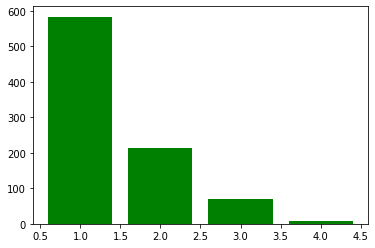

In [34]:
table_tokens_x = sorted(list(table_tokens_cnt.keys()))
table_tokens_y = [table_tokens_cnt[_x] for _x in table_tokens_x] 
plt.bar(table_tokens_x, table_tokens_y, color='green')

### Колонки

In [36]:
columns_example = get_db_columns("store_product", "store")
columns_example

['Store_ID',
 'Store_Name',
 'Type',
 'Area_size',
 'Number_of_product_category',
 'Ranking']

In [37]:
columns_tokens_lens = []
for _db in db_ids:
  db_tables = get_db_tables(_db)
  for _table in db_tables:
    db_columns = get_db_columns(_db, _table)
    columns_tokens = [len(_t.split('_')) for _t in db_columns] 
    columns_tokens_lens += columns_tokens

In [38]:
columns_tokens_cnt = Counter(columns_tokens_lens)  
columns_tokens_x = sorted(list(columns_tokens_cnt.keys()))
columns_tokens_y = [columns_tokens_cnt[_x] for _x in columns_tokens_x] 

<BarContainer object of 5 artists>

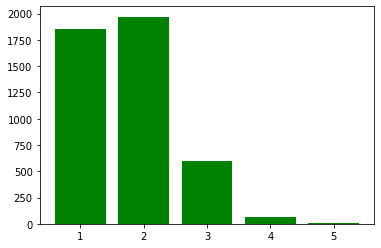

In [39]:
plt.bar(columns_tokens_x, columns_tokens_y, color='green')

### Значения

In [41]:
values_example = get_db_values("store_product", "store", 'Store_Name')
values_example

['Miramichi', 'Neguac', 'Rogersville', 'Blackville', 'Doaktown']

In [42]:
values_example = get_db_values("store_product", "store", 'Area_size')
values_example

['179.84', '26.69', '7.23', '21.73', '28.74']

In [44]:
values_tokens_lens = []
for _db in db_ids:
  db_tables = get_db_tables(_db)
  for _table in db_tables:
    db_columns = get_db_columns(_db, _table)
    for _column in db_columns:
      db_values = get_db_values(_db, _table, _column)
      values_tokens = [len(_t.split('_')) for _t in db_values] 
      values_tokens_lens += values_tokens


In [47]:
print(len(values_tokens_lens))

23435505


In [45]:
values_tokens_cnt = Counter(values_tokens_lens)  
values_tokens_x = sorted(list(values_tokens_cnt.keys()))
values_tokens_y = [values_tokens_cnt[_x] for _x in values_tokens_x] 

In [48]:
values_tokens_cnt.keys()

dict_keys([1, 2, 3, 4, 5, 6])

In [51]:
values_tokens_cnt

Counter({1: 23430681, 2: 3520, 3: 148, 4: 1038, 5: 109, 6: 9})

<BarContainer object of 6 artists>

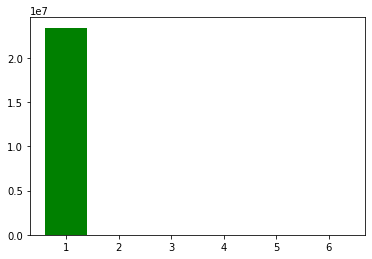

In [46]:
plt.bar(values_tokens_x, values_tokens_y, color='green')

### All entities without values

<BarContainer object of 5 artists>

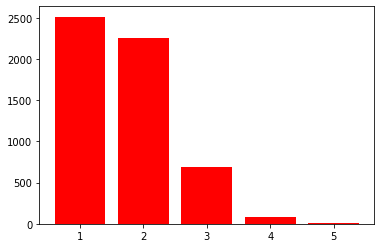

In [53]:
service_tokens_lens = db_tokens_lens + tables_tokens_lens + columns_tokens_lens
service_tokens_cnt = Counter(service_tokens_lens)  
service_tokens_x = sorted(list(service_tokens_cnt.keys()))
service_tokens_y = [service_tokens_cnt[_x] for _x in service_tokens_x] 
plt.bar(service_tokens_x, service_tokens_y, color='maroon')

<BarContainer object of 5 artists>

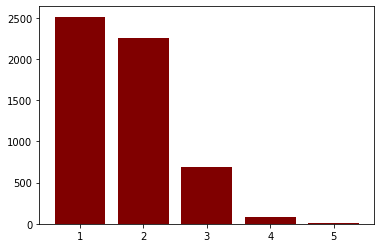

In [54]:
plt.bar(service_tokens_x, service_tokens_y, color='maroon')

In [56]:
sum(service_tokens_lens) / len(service_tokens_lens)

1.7062218214607754

### All

<BarContainer object of 6 artists>

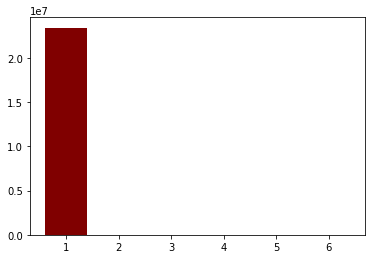

In [55]:
all_tokens_lens = db_tokens_lens + tables_tokens_lens + columns_tokens_lens + values_tokens_lens
all_tokens_cnt = Counter(all_tokens_lens)  
all_tokens_x = sorted(list(all_tokens_cnt.keys()))
all_tokens_y = [all_tokens_cnt[_x] for _x in all_tokens_x] 
plt.bar(all_tokens_x, all_tokens_y, color='maroon')

In [57]:
sum(all_tokens_lens) / len(all_tokens_lens)

1.0004832121428007